<a href="https://colab.research.google.com/github/sapritanand/Bill-of-Materials/blob/main/Bill_of_Materials_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
BOM = {
    "Assembly A": [("Sub-Assembly B", 2), ("Sub-Assembly C", 1)],
    "Assembly H": [("Sub-Assembly I", 3), ("Sub-Assembly C", 2)],
    "Sub-Assembly B": [("Part D", 4), ("Part E", 3)],
    "Sub-Assembly C": [("Part F", 2), ("Part G", 1)],
    "Sub-Assembly I": [("Part D", 2), ("Part H", 5)]
}


In [ ]:
raw_materials = {
    "Part D": 5.0,
    "Part E": 3.0,
    "Part F": 2.5,
    "Part G": 4.0,
    "Part H": 6.0
}
# Here I have added the cost per Unit To perform the calculation of total estimated cost

In [ ]:
def calculate_materials(assembly, quantity, material_counts):
    if assembly in BOM:
        for child, qty in BOM[assembly]:
            calculate_materials(child, quantity * qty, material_counts)
    else:
        material_counts[assembly] = material_counts.get(assembly, 0) + quantity

def process_bom(assembly_a_qty, assembly_h_qty):
    material_counts = {}
    calculate_materials("Assembly A", assembly_a_qty, material_counts)
    calculate_materials("Assembly H", assembly_h_qty, material_counts)
    return material_counts

def generate_bulk_template():
    template_data = pd.DataFrame(columns=["Assembly A Quantity", "Assembly H Quantity"] + list(raw_materials.keys()) + ["Total Cost"])
    template_data.loc[0] = ["Enter Quantity", "Enter Quantity"] + ["Auto-Calculated" for _ in raw_materials.keys()] + ["Auto-Calculated"]
    template_data.to_excel("BOM_Bulk_Template.xlsx", index=False)
    print("Bulk Processing Template Generated: BOM_Bulk_Template.xlsx")


In [ ]:
try:
    assembly_a_qty = int(input("Enter quantity for Assembly A: "))
    assembly_h_qty = int(input("Enter quantity for Assembly H: "))
except ValueError:
    print("Invalid input. Please enter integer values.")
    exit()


Enter quantity for Assembly A: 2
Enter quantity for Assembly H: 3


In [ ]:
material_requirements = process_bom(assembly_a_qty, assembly_h_qty)

def calculate_total_cost(material_requirements):
    total_cost = sum(material_requirements.get(material, 0) * cost for material, cost in raw_materials.items())
    return total_cost

total_cost = calculate_total_cost(material_requirements)
print("\nMaterial Requirements for Given Quantities:")
material_df = pd.DataFrame.from_dict(material_requirements, orient='index', columns=['Total Quantity'])
print(material_df)
print(f"\nTotal Estimated Cost: ${total_cost:.2f}")



Material Requirements for Given Quantities:
        Total Quantity
Part D              34
Part E              12
Part F              16
Part G               8
Part H              45

Total Estimated Cost: $548.00


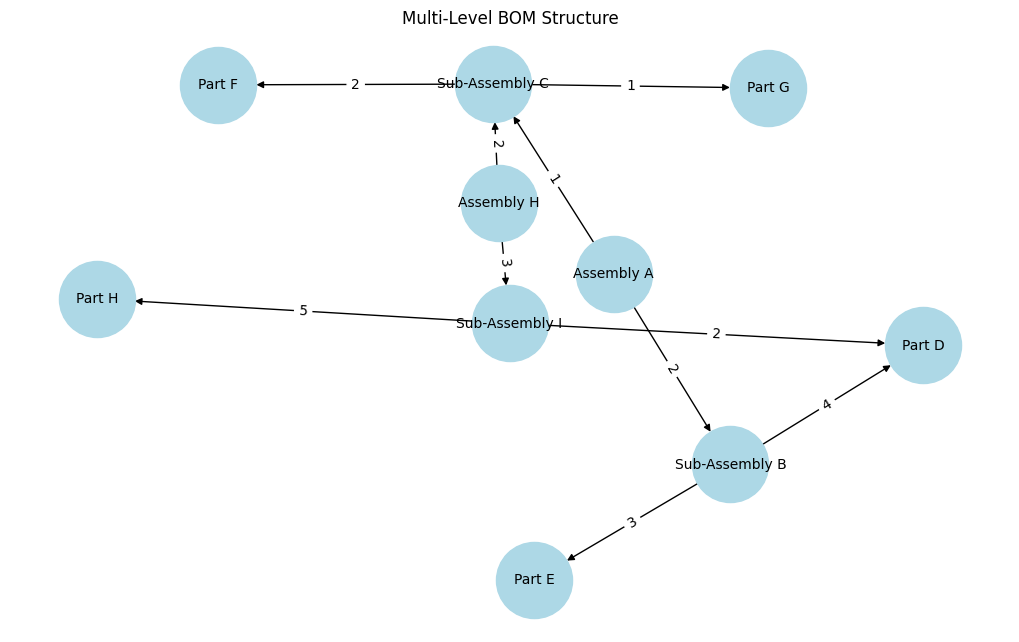

In [ ]:
G = nx.DiGraph()
for parent, children in BOM.items():
    for child, qty in children:
        G.add_edge(parent, child, label=str(qty))

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10)
labels = {(u, v): d['label'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Multi-Level BOM Structure")
plt.show()